завдання (1)

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def acquire_data(filename: str) -> pd.DataFrame:
    try:
        loaded_data = pd.read_csv(filename)
        print(f"Дані успішно завантажені з {filename}")
        return loaded_data
    except FileNotFoundError:
        print(f"Файл {filename} не було знайдено.")
        return pd.DataFrame()

csv_filename = "motorbike_ambulance_calls.csv"
dataset = acquire_data(csv_filename)

def describe_statistics(dataframe: pd.DataFrame):
    print("\n Базові статистичні характеристики:")
    display(dataframe.describe())

    extreme_values = dataframe.agg(['max', 'min'])
    print("\n Максимальні та мінімальні значення:")
    display (extreme_values)

    dataset_dimensions = dataframe.shape
    print("\n Деталі розміру датасету:")
    print(f" Кількість записів: {dataset_dimensions[0]}, Кількість атрибутів: {dataset_dimensions[1]}")

describe_statistics(dataset)


Дані успішно завантажені з motorbike_ambulance_calls.csv

 Базові статистичні характеристики:


,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000



 Максимальні та мінімальні значення:


,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
max,17379,9/9/12,winter,1,12,23,1,6,1,4,1.00,1.0,1.0,0.8507,977
min,1,1/1/11,autumn,0,1,0,0,0,0,1,0.02,0.0,0.0,0.0000,1



 Деталі розміру датасету:
 Кількість записів: 17379, Кількість атрибутів: 15


завдання (2)

In [61]:

dtypes_count = data.dtypes.value_counts()

output_string = "Типи даних та кількість змінних:\n"
for dtype, count in dtypes_count.items():
    output_string += f"{dtype}: {count}\n"

print(output_string)




Типи даних та кількість змінних:
int64: 9
float64: 4
datetime64[ns]: 1
object: 1



завдання (3)

In [64]:
total_missing = data.isnull().sum().sum()
missing_per_column = data.isnull().sum()

output_string = f"Загальна кількість пропущених значень у всьому DataFrame: {total_missing}\n"
output_string += "Кількість пропущених значень по колонках:\n"
output_string += "\n".join([f"{col}: {missing}" for col, missing in missing_per_column.items()])

print(output_string)


Загальна кількість пропущених значень у всьому DataFrame: 0
Кількість пропущених значень по колонках:
index: 0
date: 0
season: 0
yr: 0
mnth: 0
hr: 0
holiday: 0
weekday: 0
workingday: 0
weathersit: 0
temp: 0
atemp: 0
hum: 0
windspeed: 0
cnt: 0


1) Дізнався  максимальльні і мінімальні значення по кожній змінній.
2) Дізнався типи даних та кількість даних по кожній змінній.
3) Перевірив чи немає пропусків. 

завдання (4)

In [71]:
def transform_and_get_time_limits(df: pd.DataFrame, date_col_name: str) -> str:
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    first_day, last_day = df[date_col_name].min(), df[date_col_name].max()
    info = f"The first date in the dataset: {first_day}.\nThe last date in the dataset: {last_day}"
    return info

info_string = transform_and_get_time_limits(data, 'date')
print(info_string)


The first date in the dataset: 2011-01-01 00:00:00.
The last date in the dataset: 2012-12-31 00:00:00


???

завдання (5)

In [78]:
data_categories = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
print(data[data_categories].head())
data[data_categories].to_csv("categor_data.csv", index=False)


   season  yr  mnth  hr  holiday  weekday  workingday  weathersit
0  spring   0     1   0        0        6           0           1
1  spring   0     1   1        0        6           0           1
2  spring   0     1   2        0        6           0           1
3  spring   0     1   3        0        6           0           1
4  spring   0     1   4        0        6           0           1


завдання (6)

In [79]:
def encode_seasons(df: pd.DataFrame, season_col: str):
    df[season_col] = df[season_col].map({'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4})
    return df
data = encode_seasons(data, 'season')
print(data['season'].unique())


[1 2 3 4]


завдання (7)

C:\Users\Вася\AppData\Local\Temp\ipykernel_18304\2846102876.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, ax=subplot, palette=['pink', 'green'])
C:\Users\Вася\AppData\Local\Temp\ipykernel_18304\2846102876.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=variable, data=data, ax=subplot, palette=['pink', 'green'])
C:\Users\Вася\AppData\Local\Temp\ipykernel_18304\2846102876.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=data, ax=subplot, palette=['pink', 'green'])
C:\Users\Вася\AppData\Local\Temp\ipykernel_18304\2846102876.py:4: FutureWar

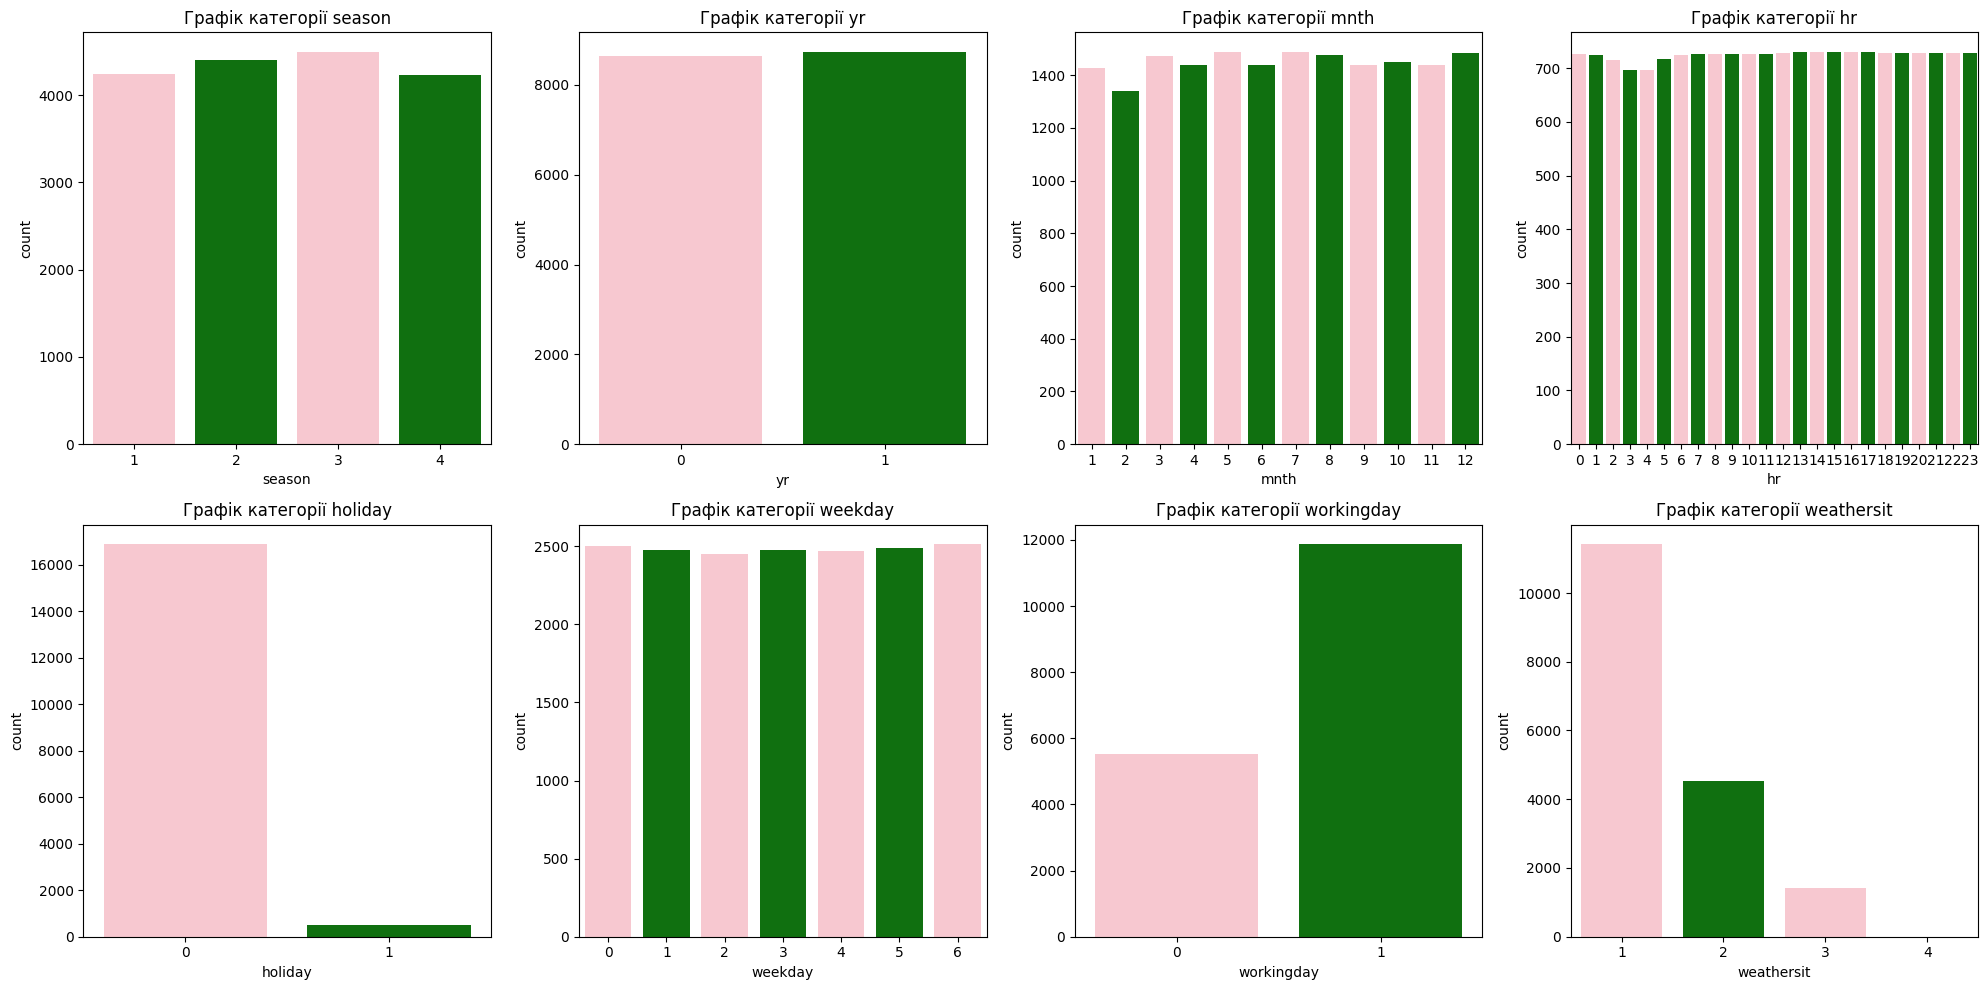

In [82]:
data_categorical = data[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']]
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical.columns, ax.ravel()):
    sns.countplot(x=variable, data=data, ax=subplot, palette=['pink', 'green'])
    subplot.set_title(f'Графік категорії {variable}')
plt.tight_layout() 
plt.show()


1) Побудував графіки також виділив змінні в окремий датасет.

завдання (8)

In [84]:
numerical_vars = ['temp', 'hum', 'windspeed', 'cnt']
print("Перші 5 рядків числових змінних:")
print(data[numerical_vars].head(5))
data[numerical_vars].to_csv("numerical_data.csv", index=False)


Перші 5 рядків числових змінних:
   temp   hum  windspeed  cnt
0  0.24  0.81        0.0   16
1  0.22  0.80        0.0   40
2  0.22  0.80        0.0   32
3  0.24  0.75        0.0   13
4  0.24  0.75        0.0    1


завдання (9)

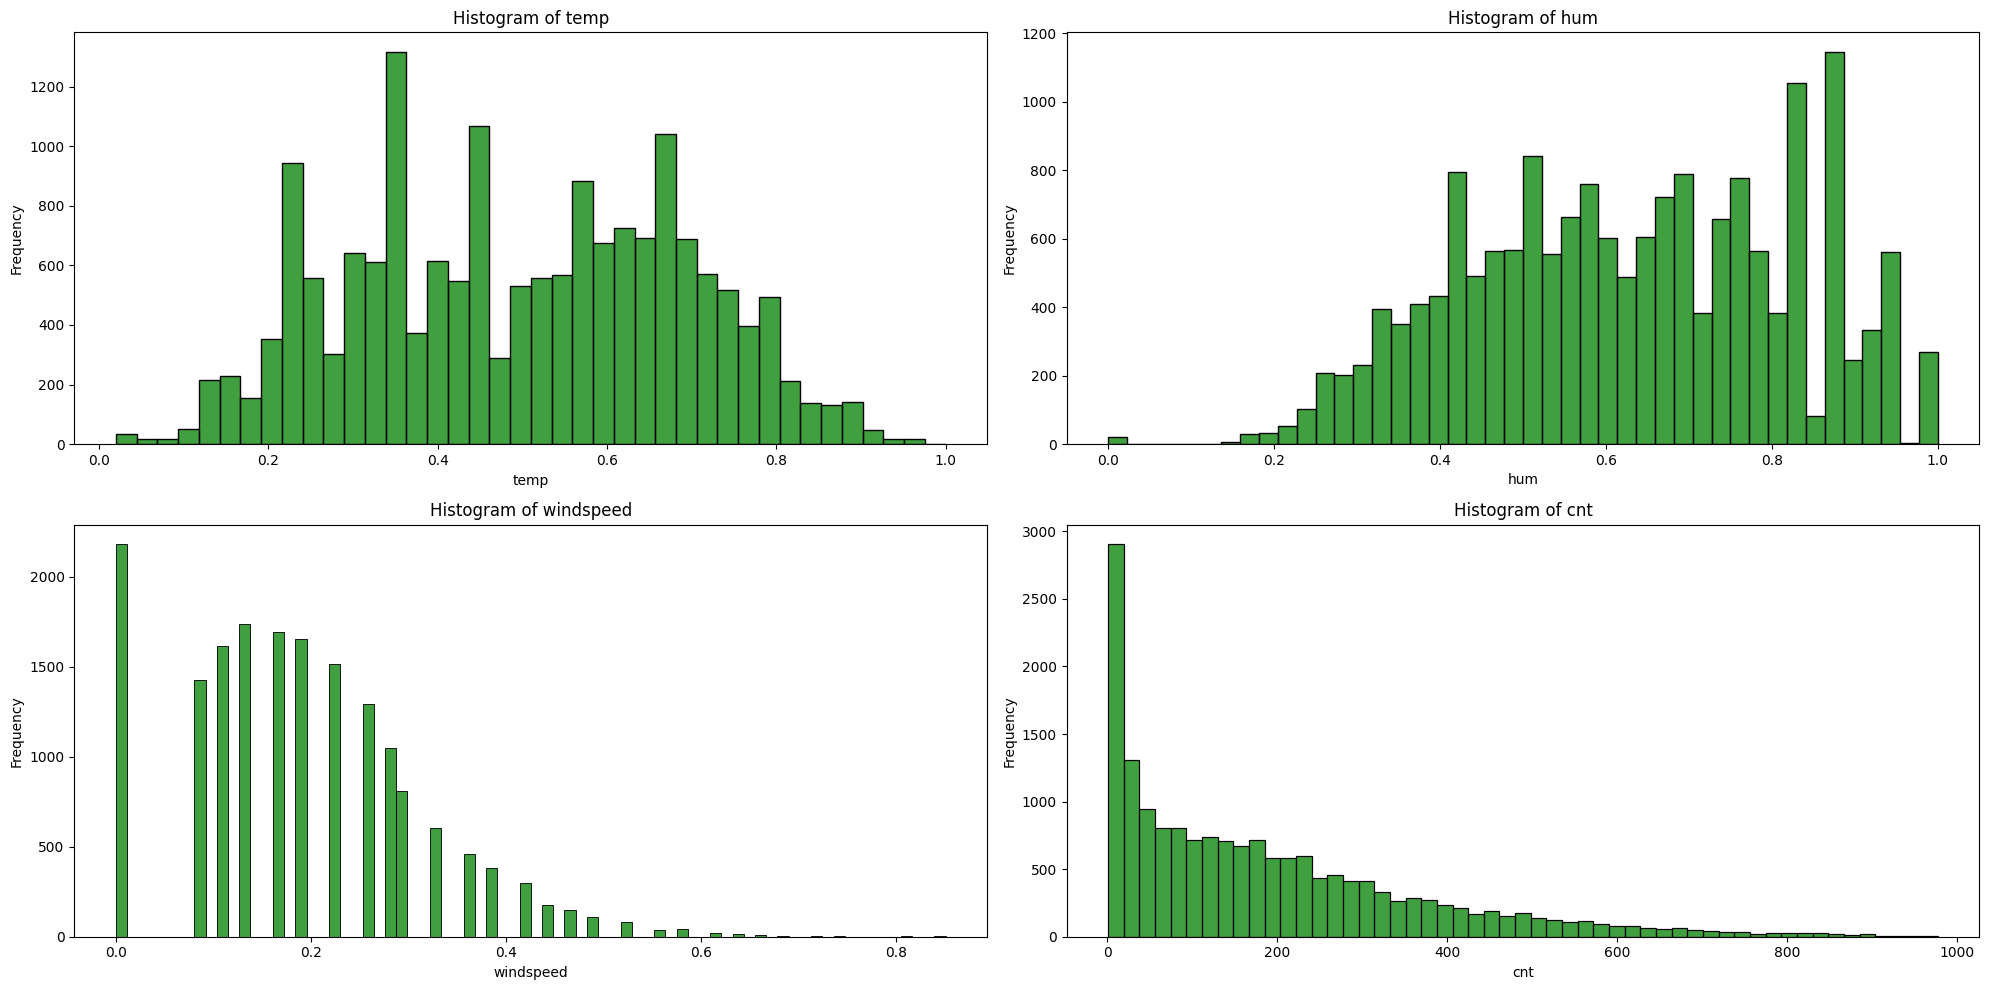

In [85]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip( data_numerical.columns, ax.flat):
    sns.histplot(data=data, x=variable, ax=subplot, color='green')
    subplot.set_title(f'Histogram of {variable}')
    subplot.set_ylabel('Frequency')
plt.tight_layout() 
plt.show()


завдання (10)

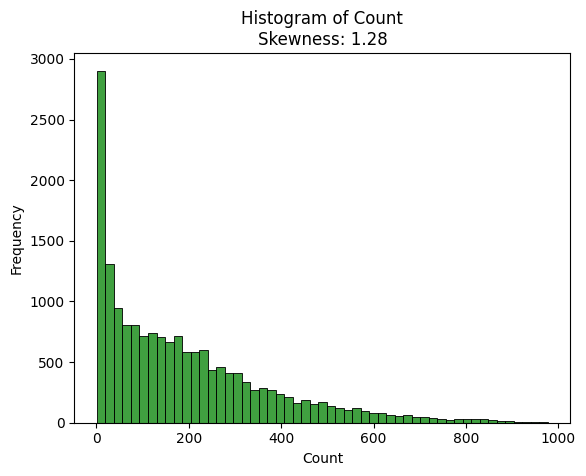

In [86]:
sns.histplot(data=data['cnt'], color='green').set(title=f'Histogram of Count\nSkewness: {data["cnt"].skew():.2f}', xlabel='Count', ylabel='Frequency')
plt.show()


1) Побудував гістаграму розподілу, яка є біномінальною.
2) Коофіцієнт нахилу є більшим 0, це означає що більшість даних зосереджені ліворуч від середнього значення. 

завдання (11)

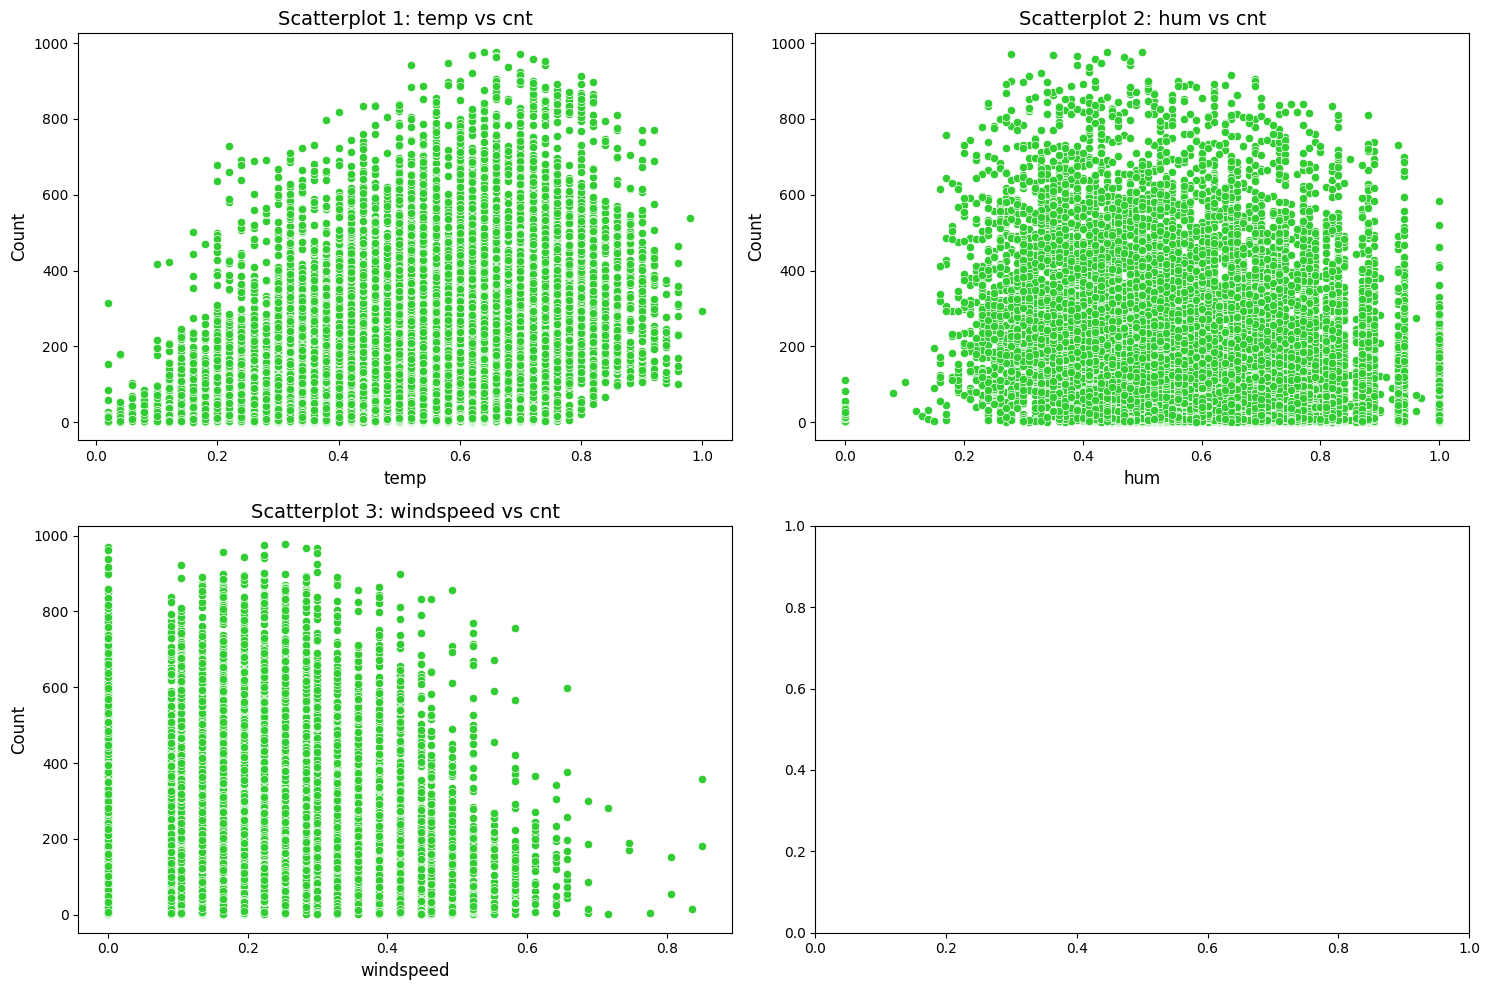

In [87]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
variables = data_numerical.columns.drop('cnt') 
for i, (variable, subplot) in enumerate(zip(variables, axes.flat), start=1):
    sns.scatterplot(x=variable, y='cnt', data=data_numerical, ax=subplot, color='limegreen').set(title=f'Scatterplot {i}: {variable} vs cnt', xlabel=variable, ylabel='Count')
    subplot.title.set_size(14)
    subplot.xaxis.label.set_size(12)
    subplot.yaxis.label.set_size(12)
    
plt.tight_layout()
plt.show()




завдання (12)

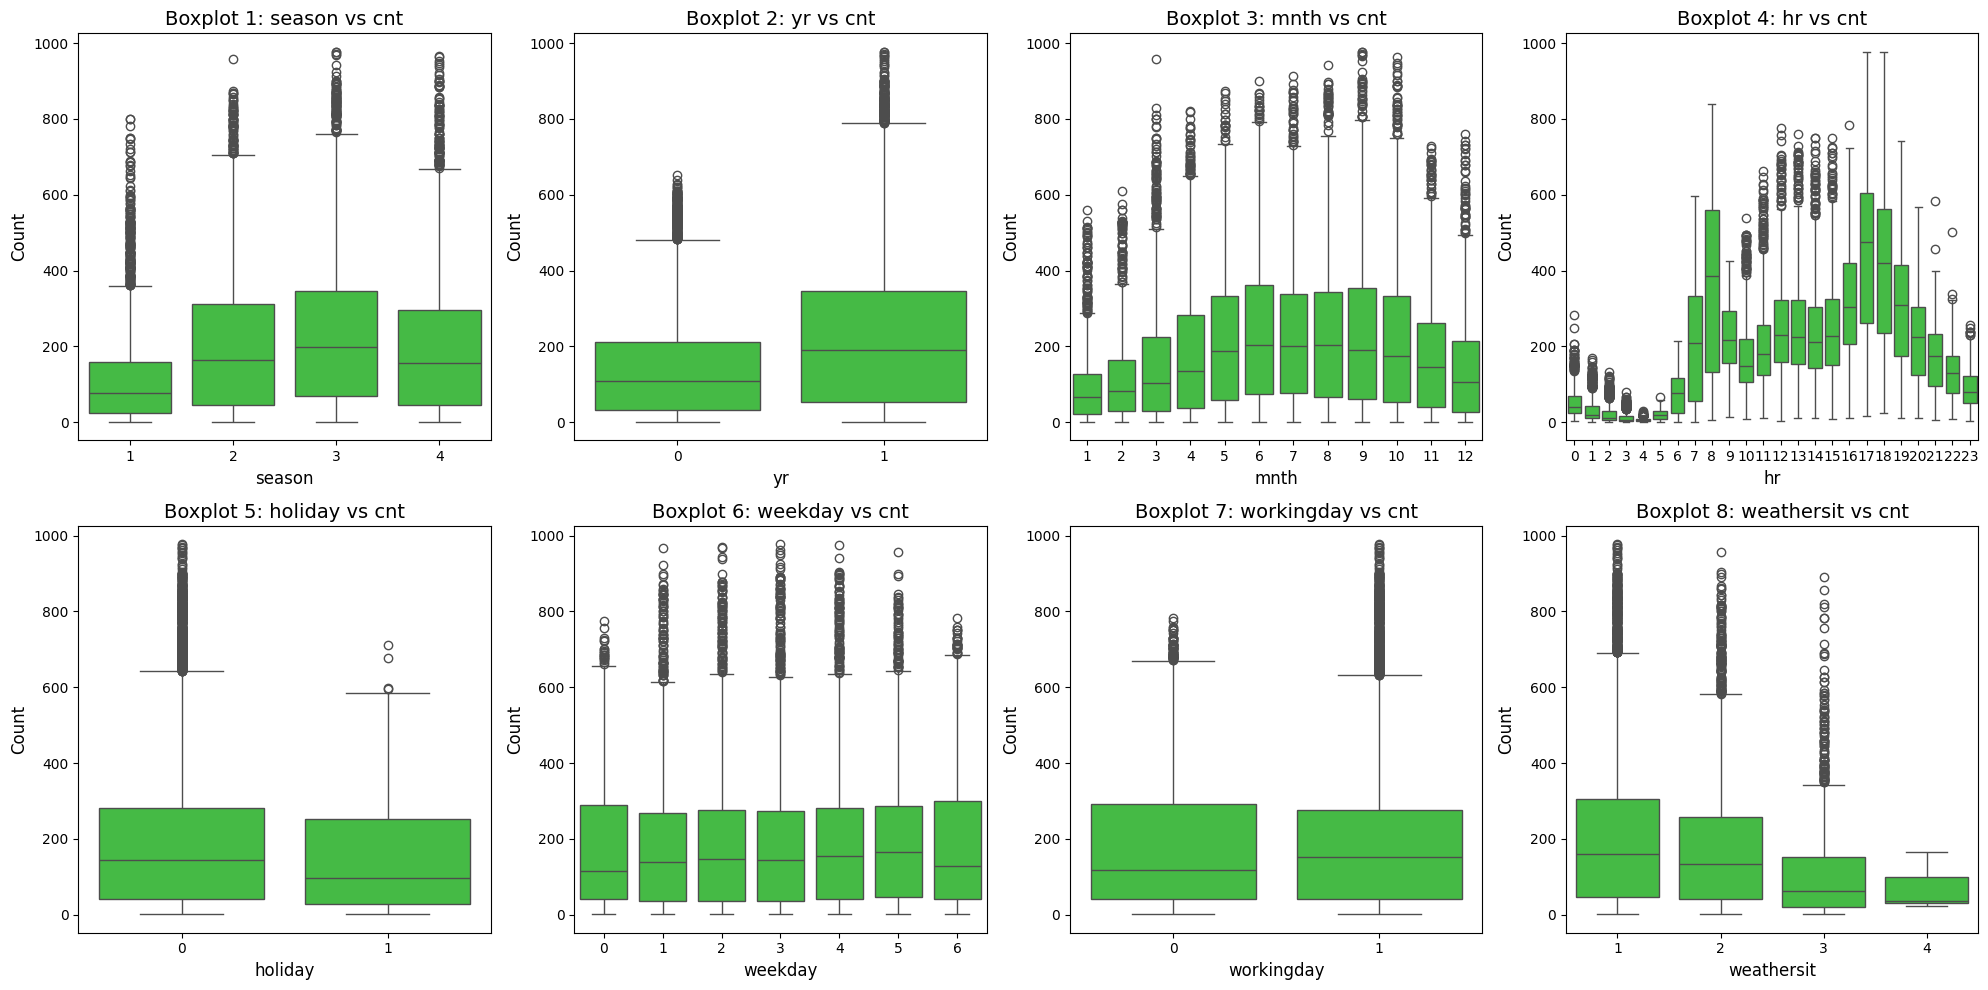

In [88]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
variables = data_categorical.columns
for i, variable in enumerate(variables, start=1):
    ax = axes.flat[i-1]
    sns.boxplot(x=variable, y='cnt', data=data, ax=ax, color='limegreen')
    ax.set(title=f'Boxplot {i}: {variable} vs cnt', xlabel=variable, ylabel='Count')
    ax.title.set_size(14)
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

plt.tight_layout()
plt.show()


1) Аналіз графіків показав, що збільшення температури повітря сприяє більшій кількості викликів. Швидкість вітру майже не впливає на цю кількість. Також відмічено, що при відсутності вітру кількість викликів зростає.
2)  Виклики найчастіше спостерігаються в певний період доби, зокрема, під час годин пік вранці та вечором, що відповідає годинам дороги на роботу.

завдання (13)

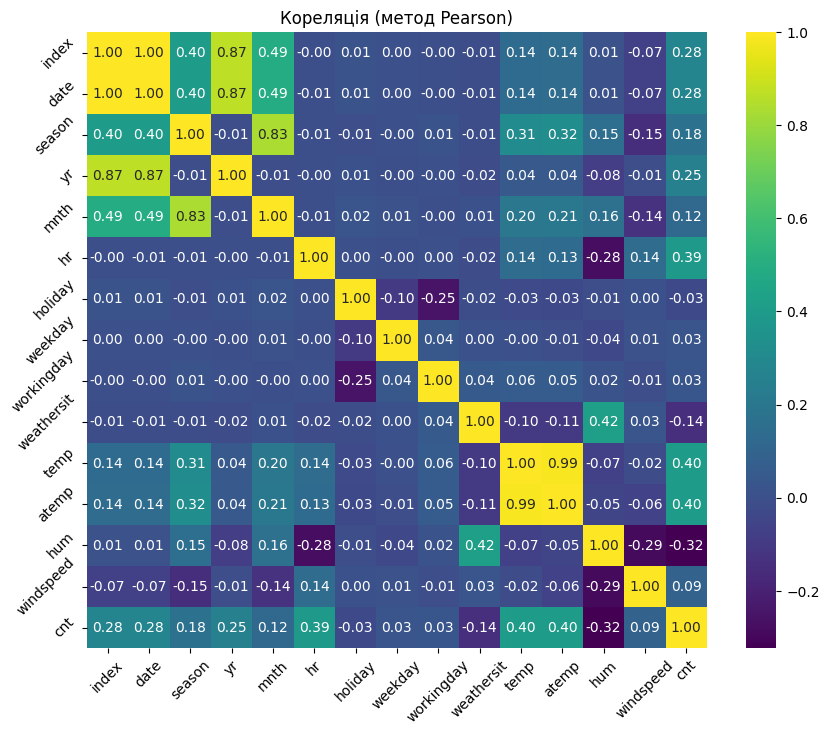

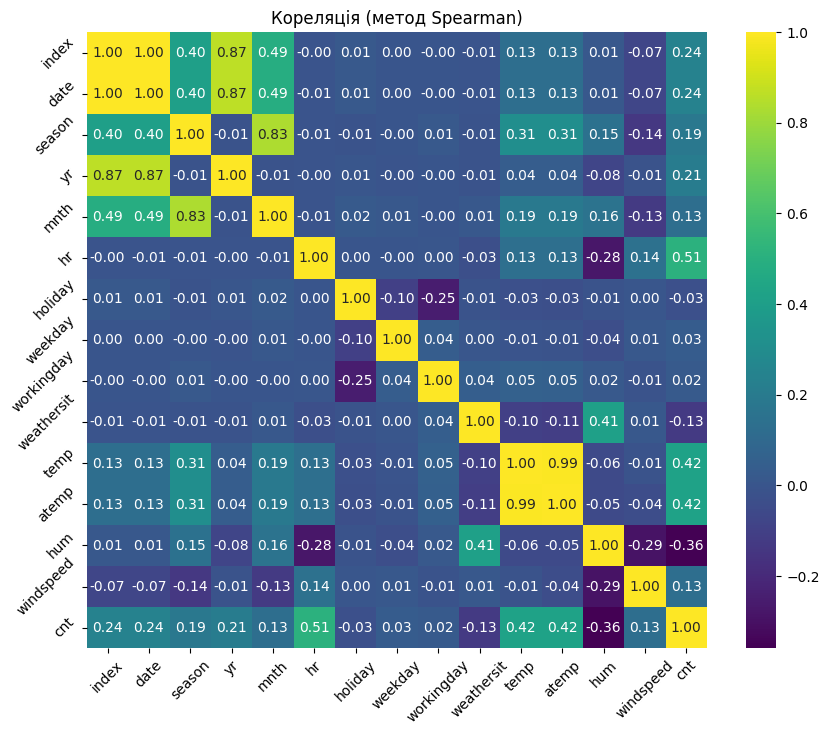

In [89]:
def plot_correlation(data, method_name):
    corr = data.corr(method=method_name)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
    plt.title(f"Кореляція (метод {method_name.capitalize()})")
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

plot_correlation(data, 'pearson')
plot_correlation(data, 'spearman')




Коефіцієнт кореляції Пірсона використовується для вимірювання сили та напрямку лінійного зв'язку між двома змінними. У той час як коефіцієнт кореляції Спірмена оцінює ступінь монотонної залежності між двома змінними, не обмежуючись лінійним зв'язком.

завдання 14

In [150]:


def enhance_features(df):
    columns_to_transform = ['season', 'mnth', 'weekday', 'weathersit']
    transformed_df = df.copy()
    for column in columns_to_transform:
        dummies = pd.get_dummies(transformed_df[column], prefix=column, drop_first=True)
        transformed_df = pd.concat([transformed_df, dummies], axis=1)
    transformed_df.drop(columns_to_transform, axis=1, inplace=True)
    
    return transformed_df

enhanced_features = enhance_features(data)
features = get_dummies(data)

In [151]:
def modify_features(df):
    enhanced_df = df.copy()
    if 'hr' in enhanced_df.columns:
        enhanced_df['is_night_time'] = enhanced_df['hr'].apply(lambda hour: hour >= 22 or hour <= 5)
        enhanced_df.drop(['hr'], axis=1, inplace=True)
    else:
        print("Column 'hr' does not exist in the DataFrame.")
    
    return enhanced_df
features_updated = modify_features(features)


In [152]:
def prepare_data_for_modeling(dataframe, target_name, split_ratio):
    features = dataframe.drop(columns=[target_name])
    target = dataframe[target_name]
    features_train, features_test, target_train, target_test = train_test_split(
        features, target, test_size=split_ratio, random_state=42
    )
    features_train.columns = features_train.columns.astype(str)
    features_test.columns = features_test.columns.astype(str)
    
    return features_train, features_test, target_train, target_test

def model_training_and_evaluation(features_train, target_train, features_test, target_test):
    regression_model = LinearRegression()
    regression_model.fit(features_train, target_train)
    
    predictions_train = regression_model.predict(features_train)
    predictions_test = regression_model.predict(features_test)
    
    mse_train = mean_squared_error(target_train, predictions_train)
    mse_test = mean_squared_error(target_test, predictions_test)
    r2_train = r2_score(target_train, predictions_train)
    r2_test = r2_score(target_test, predictions_test)
    
    print(f'MSE train: {mse_train:.3f}, test: {mse_test:.3f}')
    print(f'R^2 train: {r2_train:.3f}, test: {r2_test:.3f}')
    
    return regression_model
X_train, X_test, y_train, y_test = prepare_data_for_modeling(features_lr, 'cnt', 0.3)
model = model_training_and_evaluation(X_train, y_train, X_test, y_test)


MSE train: 15877.966, test: 15224.769
R^2 train: 0.525, test: 0.518


Оскільки наша модель включає багато незалежних змінних, ми не можемо відобразити їхні взаємозв'язки в двовимірному просторі. Однак ми можемо побудувати графік, який показує взаємозв'язок між залишковими значеннями моделі та передбаченими значеннями, що також допоможе нам оцінити якість моделі.

C:\Users\Вася\AppData\Local\Temp\ipykernel_18304\2528503118.py:6: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(y_test_pred, y_test_pred - y_test,


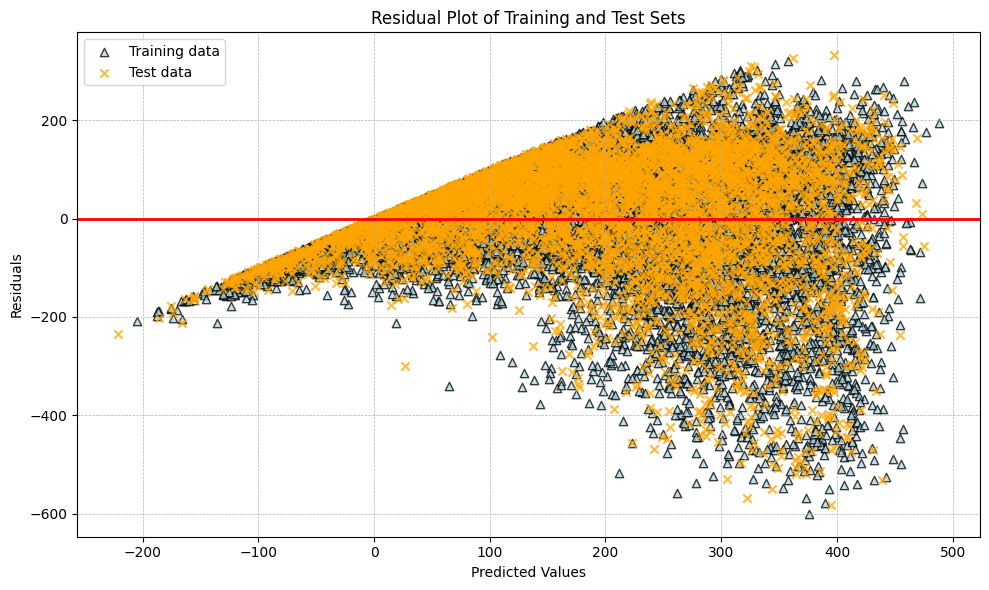

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  
plt.scatter(y_train_pred, y_train_pred - y_train,
            color='lightblue', marker='^', edgecolor='black',
            label='Training data', alpha=0.75)
plt.scatter(y_test_pred, y_test_pred - y_test,
            color='orange', marker='x', edgecolor='black',
            label='Test data', alpha=0.75)

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of Training and Test Sets')  
plt.legend(loc='upper left')
plt.axhline(y=0, xmin=0, xmax=1, linewidth=2, color='red') 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  
plt.tight_layout()
plt.show()


1.Після побудови графіку, стає очевидним, що навчальні дані надають більш точну оцінку, ніж тестові дані.
2.По обчисленнях R^2 train можна зрозуміти, що модель правильно оцінюватиме результати в 51.7% випадків. 
3.Було виключено змінну date і atemp з моделі, оскільки date не потрібна для даної моделі, а atemp спричиняє мультиколінеарність із temp.